In [1]:
import sqlite3
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect("vaccination.db")
cur = conn.cursor()

In [3]:
pd.set_option('display.max_rows', 1000)

In [4]:
df = pd.read_sql_query("SELECT * FROM vaccination", conn)
df

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Afghanistan,AFG,EMRO,REPORTING,2022-12-05,12304901,1.132091e+07,31.609,29.081,10615628,27.270,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-02-22,11,0,0.000
1,Albania,ALB,EURO,REPORTING,2022-11-27,3017443,1.341413e+06,104.900,47.134,1269112,44.594,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",2021-01-13,5,373263,13.116
2,Algeria,DZA,AFRO,REPORTING,2022-09-04,15267442,7.840131e+06,34.817,17.879,6481186,14.780,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",2021-01-30,4,575651,1.313
3,American Samoa,ASM,WPRO,REPORTING,2022-08-23,111316,4.488500e+04,201.670,81.318,41423,75.046,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2020-12-21,3,24160,43.770
4,Andorra,AND,EURO,REPORTING,2022-11-13,154367,5.790100e+04,199.800,76.009,53485,70.211,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",2021-01-20,3,42981,56.423
5,Angola,AGO,AFRO,REPORTING,2022-12-04,23468138,1.488785e+07,71.405,45.298,8193976,24.931,SII - Covishield,2021-03-10,1,1368465,4.164
6,Anguilla,AIA,AMRO,REPORTING,2022-12-02,24441,1.085200e+04,162.918,72.337,10373,69.144,"AstraZeneca - Vaxzevria,Pfizer BioNTech - Comi...",2021-02-05,2,2998,19.984
7,Antigua and Barbuda,ATG,AMRO,REPORTING,2022-12-02,136512,6.429000e+04,139.399,65.650,62384,63.703,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-03-01,6,9838,10.046
8,Argentina,ARG,AMRO,REPORTING,2022-10-07,109652736,4.132410e+07,242.617,91.434,37840119,83.725,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2020-12-29,7,30810184,68.170
9,Armenia,ARM,EURO,REPORTING,2022-05-22,2150112,1.129669e+06,72.600,38.123,985807,33.268,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-06-16,8,40725,1.374


In [5]:
df.shape

(228, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   COUNTRY                               228 non-null    object 
 1   ISO3                                  228 non-null    object 
 2   WHO_REGION                            228 non-null    object 
 3   DATA_SOURCE                           228 non-null    object 
 4   DATE_UPDATED                          228 non-null    object 
 5   TOTAL_VACCINATIONS                    228 non-null    int64  
 6   PERSONS_VACCINATED_1PLUS_DOSE         227 non-null    float64
 7   TOTAL_VACCINATIONS_PER100             227 non-null    float64
 8   PERSONS_VACCINATED_1PLUS_DOSE_PER100  227 non-null    float64
 9   PERSONS_FULLY_VACCINATED              228 non-null    int64  
 10  PERSONS_FULLY_VACCINATED_PER100       228 non-null    float64
 11  VACCINES_USED      

# Top 5 countries that have highly vaccinated its citizens.

In [23]:
df1 = pd.read_sql_query("SELECT COUNTRY,  PERSONS_FULLY_VACCINATED_PER100 FROM vaccination ORDER BY PERSONS_FULLY_VACCINATED_PER100 DESC LIMIT 5", conn)
df1

,COUNTRY,PERSONS_FULLY_VACCINATED_PER100
0,Tokelau,163.185
1,Gibraltar,122.944
2,Brunei Darussalam,101.932
3,Palau,101.067
4,United Arab Emirates,99.008


# Top 5 countries which needs to increase its vaccination speed.

In [24]:
df2 = pd.read_sql_query("SELECT COUNTRY,  PERSONS_FULLY_VACCINATED_PER100 FROM vaccination ORDER BY PERSONS_FULLY_VACCINATED_PER100 LIMIT 5", conn)
df2

,COUNTRY,PERSONS_FULLY_VACCINATED_PER100
0,Burundi,0.227
1,Haiti,2.082
2,Yemen,2.540
3,Papua New Guinea,3.405
4,Democratic Republic of the Congo,6.226


# TOP 10 COUNTRIES TOTAL_VACCINATIONS_PER100

In [25]:
df3 = pd.read_sql_query("SELECT *  FROM vaccination ORDER BY TOTAL_VACCINATIONS_PER100 DESC LIMIT 10", conn)
df3

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Tokelau,TKL,WPRO,REPORTING,2022-11-23,6342,2203.0,469.778,163.185,2203,163.185,Pfizer BioNTech - Comirnaty,2021-07-20,1,968,71.704
1,Gibraltar,GIB,EURO,OWID,2022-04-21,119855,42074.0,355.748,124.882,41421,122.944,"AstraZeneca - AZD1222, Pfizer BioNTech - Comir...",2021-10-18,2,36360,107.922
2,Cuba,CUB,AMRO,REPORTING,2022-12-02,37948799,10714892.0,335.041,94.599,10001265,88.299,"CIGB - CIGB-66,Finlay - Soberana Plus,Finlay -...",2021-10-18,3,8654299,76.407
3,Chile,CHL,AMRO,REPORTING,2022-12-02,63457008,18079923.0,331.954,94.579,17692375,92.552,"AstraZeneca - Vaxzevria,CanSino - Convidecia,M...",2020-12-21,5,15700611,82.132
4,Palau,PLW,WPRO,REPORTING,2022-11-21,53177,20100.0,293.925,111.099,18285,101.067,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2021-01-03,3,12866,71.114
5,Brunei Darussalam,BRN,WPRO,REPORTING,2022-11-25,1283392,450404.0,293.361,102.954,445929,101.932,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-04-03,5,338987,77.486
6,Puerto Rico,PRI,AMRO,REPORTING,2022-12-02,7935039,3135599.0,277.366,109.604,2767444,96.735,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Nova...",2021-10-18,4,1755246,61.354
7,Japan,JPN,WPRO,REPORTING,2022-11-30,349234331,104397006.0,276.126,82.543,102995116,81.434,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Nov...",2021-02-17,4,84320120,66.669
8,Pitcairn Islands,PCN,WPRO,REPORTING,2022-02-28,138,55.0,276.000,110.000,37,74.000,AstraZeneca - Vaxzevria,2021-05-17,1,23,46.000
9,Guernsey,GGY,EURO,OWID,2022-12-05,177394,NaN,275.166,NaN,52691,81.732,"Moderna - mRNA-1273, AstraZeneca - AZD1222, Pf...",2021-10-18,3,68283,105.918


Text(0.5, 1.0, 'TOP 10 TOTAL_VACCINATIONS_PER100')

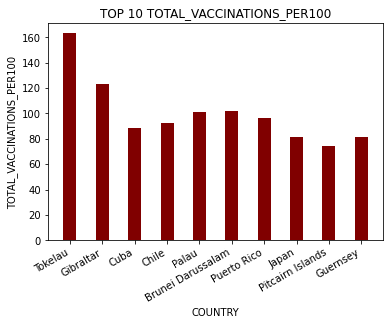

In [26]:
plt.bar(df3['COUNTRY'], df3['PERSONS_FULLY_VACCINATED_PER100'], color ='maroon',
        width = 0.4)

plt.xticks(rotation=30, ha='right')
plt.xlabel("COUNTRY")
plt.ylabel("TOTAL_VACCINATIONS_PER100")
plt.title("TOP 10 TOTAL_VACCINATIONS_PER100")


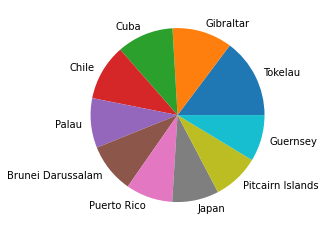

In [27]:
plt.pie(df3['TOTAL_VACCINATIONS_PER100'], labels = df3['COUNTRY'])
plt.show()

# TOP 10 COUNTRIES PERSONS_VACCINATED_1PLUS_DOSE_PER100

In [28]:
df4 = pd.read_sql_query("SELECT *  FROM vaccination ORDER BY PERSONS_VACCINATED_1PLUS_DOSE_PER100 DESC LIMIT 10", conn)
df4

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Tokelau,TKL,WPRO,REPORTING,2022-11-23,6342,2203,469.778,163.185,2203,163.185,Pfizer BioNTech - Comirnaty,2021-07-20,1,968,71.704
1,Gibraltar,GIB,EURO,OWID,2022-04-21,119855,42074,355.748,124.882,41421,122.944,"AstraZeneca - AZD1222, Pfizer BioNTech - Comir...",2021-10-18,2,36360,107.922
2,Palau,PLW,WPRO,REPORTING,2022-11-21,53177,20100,293.925,111.099,18285,101.067,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2021-01-03,3,12866,71.114
3,Pitcairn Islands,PCN,WPRO,REPORTING,2022-02-28,138,55,276.000,110.000,37,74.000,AstraZeneca - Vaxzevria,2021-05-17,1,23,46.000
4,Puerto Rico,PRI,AMRO,REPORTING,2022-12-02,7935039,3135599,277.366,109.604,2767444,96.735,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Nova...",2021-10-18,4,1755246,61.354
5,Brunei Darussalam,BRN,WPRO,REPORTING,2022-11-25,1283392,450404,293.361,102.954,445929,101.932,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-04-03,5,338987,77.486
6,United Arab Emirates,ARE,EMRO,REPORTING,2022-07-06,24922054,9991089,251.982,101.018,9792266,99.008,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-10-18,11,5138699,51.956
7,Qatar,QAT,EMRO,REPORTING,2022-12-07,7598949,2849545,263.756,98.906,2849544,98.906,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-10-18,10,1899860,65.943
8,Nauru,NRU,WPRO,REPORTING,2022-07-11,24143,10493,222.845,96.853,8585,79.241,"AstraZeneca - Vaxzevria,SII - Covishield",2021-04-09,2,5065,46.751
9,Samoa,WSM,WPRO,REPORTING,2022-11-21,448933,191130,226.261,96.329,177651,89.536,"AstraZeneca - Vaxzevria,Pfizer BioNTech - Comi...",2021-04-18,2,79061,39.846


Text(0.5, 1.0, 'TOP 10 PERSONS_VACCINATED_1PLUS_DOSE_PER100')

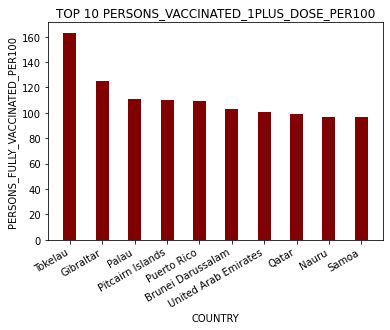

In [29]:
plt.bar(df4['COUNTRY'], df4['PERSONS_VACCINATED_1PLUS_DOSE_PER100'], color ='maroon',
        width = 0.4)

plt.xticks(rotation=30, ha='right')
plt.xlabel("COUNTRY")
plt.ylabel("PERSONS_FULLY_VACCINATED_PER100")
plt.title("TOP 10 PERSONS_VACCINATED_1PLUS_DOSE_PER100")

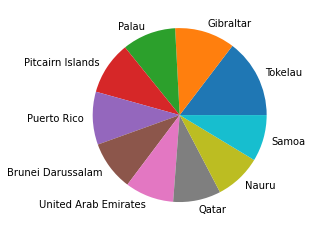

In [30]:
plt.pie(df4['PERSONS_VACCINATED_1PLUS_DOSE_PER100'], labels = df4['COUNTRY'])
plt.show()

# TOP 10 COUNTRIES PERSONS_FULLY_VACCINATED_PER100

In [31]:
df5 = pd.read_sql_query("SELECT *  FROM vaccination ORDER BY PERSONS_FULLY_VACCINATED_PER100 DESC LIMIT 10", conn)
df5

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Tokelau,TKL,WPRO,REPORTING,2022-11-23,6342,2203,469.778,163.185,2203,163.185,Pfizer BioNTech - Comirnaty,2021-07-20,1,968,71.704
1,Gibraltar,GIB,EURO,OWID,2022-04-21,119855,42074,355.748,124.882,41421,122.944,"AstraZeneca - AZD1222, Pfizer BioNTech - Comir...",2021-10-18,2,36360,107.922
2,Brunei Darussalam,BRN,WPRO,REPORTING,2022-11-25,1283392,450404,293.361,102.954,445929,101.932,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-04-03,5,338987,77.486
3,Palau,PLW,WPRO,REPORTING,2022-11-21,53177,20100,293.925,111.099,18285,101.067,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2021-01-03,3,12866,71.114
4,United Arab Emirates,ARE,EMRO,REPORTING,2022-07-06,24922054,9991089,251.982,101.018,9792266,99.008,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-10-18,11,5138699,51.956
5,Qatar,QAT,EMRO,REPORTING,2022-12-07,7598949,2849545,263.756,98.906,2849544,98.906,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-10-18,10,1899860,65.943
6,Puerto Rico,PRI,AMRO,REPORTING,2022-12-02,7935039,3135599,277.366,109.604,2767444,96.735,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Nova...",2021-10-18,4,1755246,61.354
7,Chile,CHL,AMRO,REPORTING,2022-12-02,63457008,18079923,331.954,94.579,17692375,92.552,"AstraZeneca - Vaxzevria,CanSino - Convidecia,M...",2020-12-21,5,15700611,82.132
8,Cayman Islands,CYM,AMRO,REPORTING,2022-12-02,149370,61818,227.282,94.063,60499,92.056,Pfizer BioNTech - Comirnaty,2021-01-15,1,24064,36.616
9,Samoa,WSM,WPRO,REPORTING,2022-11-21,448933,191130,226.261,96.329,177651,89.536,"AstraZeneca - Vaxzevria,Pfizer BioNTech - Comi...",2021-04-18,2,79061,39.846


Text(0.5, 1.0, 'TOP 10 PERSONS_FULLY_VACCINATED_PER100')

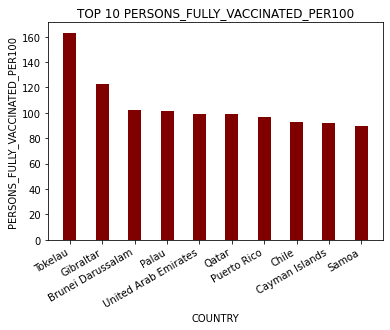

In [32]:
plt.bar(df5['COUNTRY'], df5['PERSONS_FULLY_VACCINATED_PER100'], color ='maroon',
        width = 0.4)

plt.xticks(rotation=30, ha='right')
plt.xlabel("COUNTRY")
plt.ylabel("PERSONS_FULLY_VACCINATED_PER100")
plt.title("TOP 10 PERSONS_FULLY_VACCINATED_PER100")

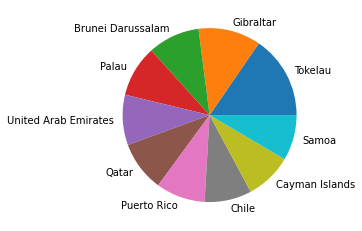

In [33]:
plt.pie(df5['PERSONS_FULLY_VACCINATED_PER100'], labels = df5['COUNTRY'])
plt.show()

# TOP 10 COUNTRIES PERSONS_BOOSTER_ADD_DOSE_PER100

In [34]:
df6 = pd.read_sql_query("SELECT *  FROM vaccination ORDER BY PERSONS_BOOSTER_ADD_DOSE_PER100 DESC LIMIT 10", conn)
df6

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Gibraltar,GIB,EURO,OWID,2022-04-21,119855,42074.0,355.748,124.882,41421,122.944,"AstraZeneca - AZD1222, Pfizer BioNTech - Comir...",2021-10-18,2,36360,107.922
1,Guernsey,GGY,EURO,OWID,2022-12-05,177394,NaN,275.166,NaN,52691,81.732,"Moderna - mRNA-1273, AstraZeneca - AZD1222, Pf...",2021-10-18,3,68283,105.918
2,Bhutan,BTN,SEARO,REPORTING,2022-10-30,2011426,699116.0,260.680,90.605,677669,87.826,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-03-27,5,634641,82.249
3,Chile,CHL,AMRO,REPORTING,2022-12-02,63457008,18079923.0,331.954,94.579,17692375,92.552,"AstraZeneca - Vaxzevria,CanSino - Convidecia,M...",2020-12-21,5,15700611,82.132
4,Brunei Darussalam,BRN,WPRO,REPORTING,2022-11-25,1283392,450404.0,293.361,102.954,445929,101.932,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-04-03,5,338987,77.486
5,Singapore,SGP,WPRO,REPORTING,2022-11-28,14794080,5156279.0,252.875,88.136,5113405,87.404,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2020-12-30,4,4524396,77.336
6,Cuba,CUB,AMRO,REPORTING,2022-12-02,37948799,10714892.0,335.041,94.599,10001265,88.299,"CIGB - CIGB-66,Finlay - Soberana Plus,Finlay -...",2021-10-18,3,8654299,76.407
7,Italy,ITA,EURO,REPORTING,2022-11-27,148917486,50570155.0,249.700,84.795,49472807,82.950,"AstraZeneca - Vaxzevria,Janssen - Ad26.COV 2-S...",2020-12-23,8,44795110,75.107
8,Falkland Islands (Malvinas),FLK,AMRO,REPORTING,2022-06-21,9390,3220.0,269.595,92.449,2976,85.444,AstraZeneca - AZD1222,2021-10-18,1,2543,73.012
9,Tokelau,TKL,WPRO,REPORTING,2022-11-23,6342,2203.0,469.778,163.185,2203,163.185,Pfizer BioNTech - Comirnaty,2021-07-20,1,968,71.704


Text(0.5, 1.0, 'TOP 10 PERSONS_BOOSTER_ADD_DOSE_PER100')

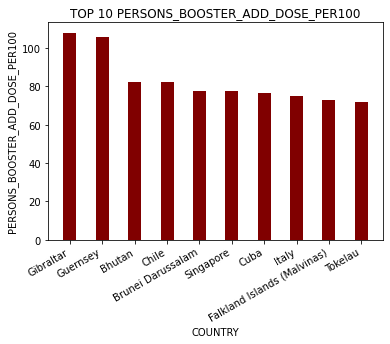

In [35]:
plt.bar(df6['COUNTRY'], df6['PERSONS_BOOSTER_ADD_DOSE_PER100'], color ='maroon',
        width = 0.4)

plt.xticks(rotation=30, ha='right')
plt.xlabel("COUNTRY")
plt.ylabel("PERSONS_BOOSTER_ADD_DOSE_PER100")
plt.title("TOP 10 PERSONS_BOOSTER_ADD_DOSE_PER100")

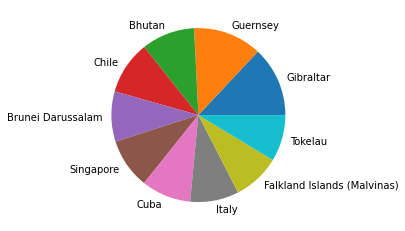

In [36]:
plt.pie(df6['PERSONS_BOOSTER_ADD_DOSE_PER100'], labels = df6['COUNTRY'])
plt.show()

# Types and number of vaccines used by the countries

In [37]:
df7 = pd.read_sql_query("SELECT COUNTRY, VACCINES_USED, NUMBER_VACCINES_TYPES_USED FROM vaccination WHERE COUNTRY IN ('Tokelau', 'Gibraltar', 'Iran (Islamic Republic of)', 'China', 'United States of America', 'Japan')", conn)
df7

,COUNTRY,VACCINES_USED,NUMBER_VACCINES_TYPES_USED
0,China,"Anhui ZL - Zifivax,Beijing CNBG - BBIBP-CorV,C...",8
1,Gibraltar,"AstraZeneca - AZD1222, Pfizer BioNTech - Comir...",2
2,Iran (Islamic Republic of),"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",12
3,Japan,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Nov...",4
4,Tokelau,Pfizer BioNTech - Comirnaty,1
5,United States of America,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Nova...",4


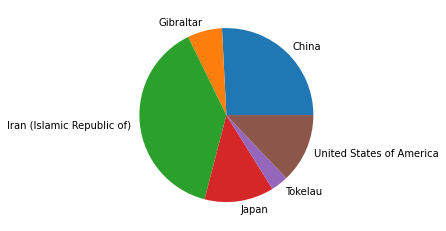

In [38]:
plt.pie(df7['NUMBER_VACCINES_TYPES_USED'], labels = df7['COUNTRY'])
plt.show()

# Country that has used the highest number of vaccine types.

In [40]:
df8 = pd.read_sql_query("SELECT COUNTRY,  NUMBER_VACCINES_TYPES_USED FROM vaccination ORDER BY NUMBER_VACCINES_TYPES_USED DESC LIMIT 5", conn)
df8

,COUNTRY,NUMBER_VACCINES_TYPES_USED
0,Iran (Islamic Republic of),12
1,Afghanistan,11
2,Bahrain,11
3,Djibouti,11
4,Oman,11


# Country that is first to start the vaccination.

In [41]:
df9 = pd.read_sql_query("SELECT COUNTRY,  FIRST_VACCINE_DATE FROM vaccination ORDER BY FIRST_VACCINE_DATE LIMIT 1", conn)
df9

,COUNTRY,FIRST_VACCINE_DATE
0,China,2020-07-22


# TOP 10 COUNTRIES WHO STARTED VACCINATIONS AT EARLY

In [43]:
df10 = pd.read_sql_query("SELECT *  FROM vaccination ORDER BY FIRST_VACCINE_DATE LIMIT 10", conn)
df10

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,China,CHN,WPRO,REPORTING,2022-11-29,3465113661,1307511577,235.516,88.869,1277356924,86.819,"Anhui ZL - Zifivax,Beijing CNBG - BBIBP-CorV,C...",2020-07-22,8,804850776,54.704
1,Bahrain,BHR,EMRO,REPORTING,2022-12-01,3476024,1241104,204.283,72.939,1226717,72.093,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2020-11-04,11,1008203,59.251
2,Lao People's Democratic Republic,LAO,WPRO,REPORTING,2022-11-21,12788802,6089817,175.778,83.702,5422886,74.536,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2020-11-25,8,2026888,27.859
3,Canada,CAN,AMRO,REPORTING,2022-12-02,91988426,32557558,243.729,86.263,31216071,82.709,"AstraZeneca - Vaxzevria,Janssen - Ad26.COV 2-S...",2020-12-14,5,19530934,51.748
4,United States of America,USA,AMRO,REPORTING,2022-12-02,647345101,264210934,195.571,79.821,225602016,68.157,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Nova...",2020-12-14,4,113031737,34.148
5,Denmark,DNK,EURO,REPORTING,2022-11-27,15087203,4810945,259.100,82.623,4797825,82.398,"AstraZeneca - Vaxzevria,Janssen - Ad26.COV 2-S...",2020-12-16,5,3675463,63.122
6,Israel,ISR,EURO,REPORTING,2022-06-05,15026951,7055466,173.600,81.514,6385731,73.776,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",2020-12-16,3,1585754,18.321
7,Northern Mariana Islands (Commonwealth of the),MNP,WPRO,REPORTING,2022-11-04,116159,46466,201.816,80.730,45012,78.204,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2020-12-19,3,24235,42.106
8,American Samoa,ASM,WPRO,REPORTING,2022-08-23,111316,44885,201.670,81.318,41423,75.046,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2020-12-21,3,24160,43.770
9,Chile,CHL,AMRO,REPORTING,2022-12-02,63457008,18079923,331.954,94.579,17692375,92.552,"AstraZeneca - Vaxzevria,CanSino - Convidecia,M...",2020-12-21,5,15700611,82.132


Text(0.5, 1.0, 'COUNTRY WITH INITIAL VACCINATION DATE')

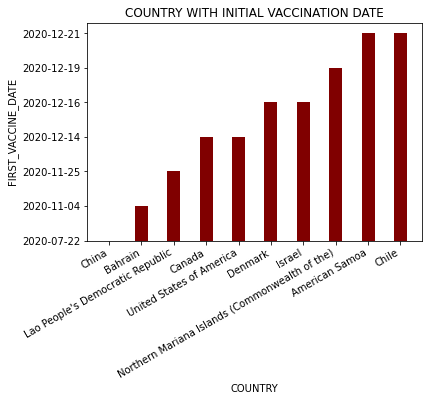

In [44]:
plt.bar(df10['COUNTRY'], df10['FIRST_VACCINE_DATE'], color ='maroon',
        width = 0.4)

plt.xticks(rotation=30, ha='right')
plt.xlabel("COUNTRY")
plt.ylabel("FIRST_VACCINE_DATE")
plt.title("COUNTRY WITH INITIAL VACCINATION DATE")

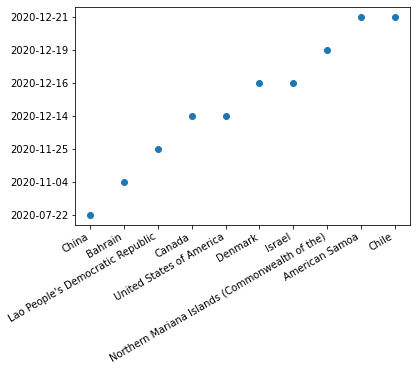

In [45]:
plt.scatter(df10['COUNTRY'], df10['FIRST_VACCINE_DATE'])
plt.xticks(rotation=30, ha='right')
plt.show()

# Total no. of countries that has vaccinated its citizens atleast 50%.

In [46]:
df11 = pd.read_sql_query("SELECT COUNT(COUNTRY) AS [No. OF COUNTRIES] FROM vaccination WHERE PERSONS_FULLY_VACCINATED_PER100 > 50", conn)
df11

,No. OF COUNTRIES
0,145
